In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading data
dataset = pd.read_csv('C:\\Users\\HP-DK0272TX\\OneDrive\\Desktop\\file\\Codingrad\\Titanic-Train-Data.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Missing data

In [3]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

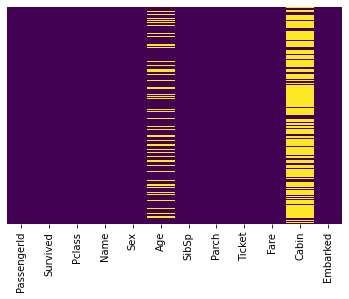

In [4]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')


<AxesSubplot:xlabel='Survived', ylabel='count'>

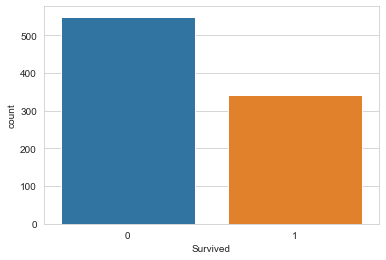

In [5]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", data = dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

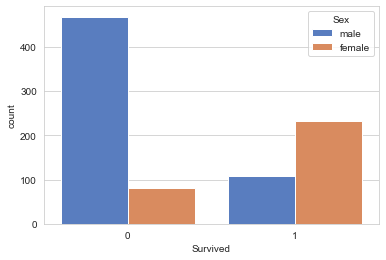

In [6]:
sns.set_style("whitegrid")
sns.countplot(x ='Survived',hue ='Sex', data = dataset, palette = "muted")


<AxesSubplot:xlabel='Survived', ylabel='count'>

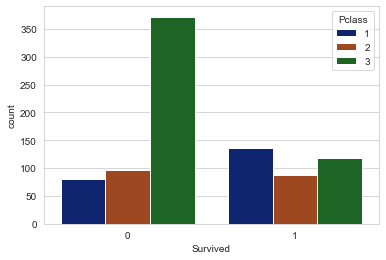

In [7]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = dataset, palette = 'dark')

<AxesSubplot:>

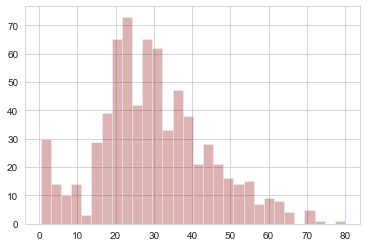

In [8]:
dataset['Age'].hist(bins=30, color='darkred', alpha=0.3)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

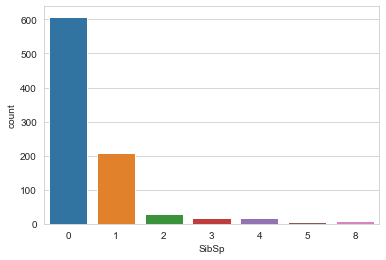

In [9]:
sns.countplot(x='SibSp', data = dataset)

<AxesSubplot:>

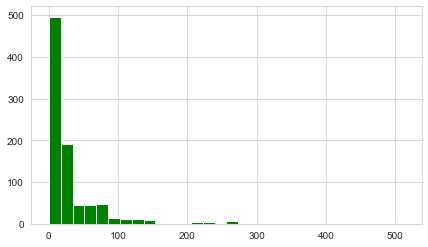

In [10]:
dataset['Fare'].hist(bins=30, color ='green', figsize=(7,4))


# Data cleaning

we want to fill in missing age data instead of dropping it.

one way to do this is by filling the mean age of all the passengers (imputation).

however we can be smarter about this and check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

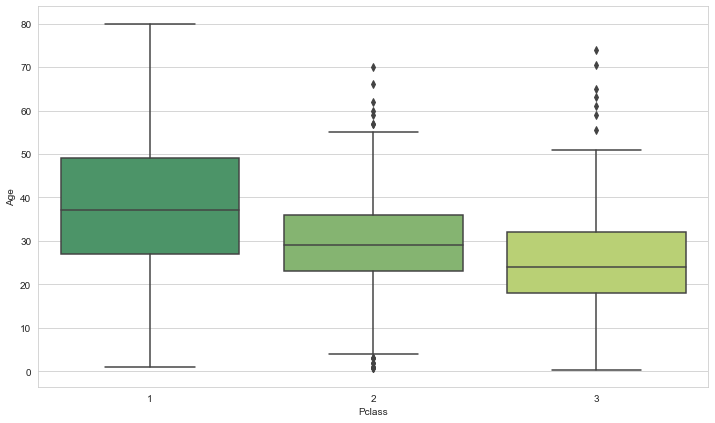

In [11]:
plt.figure(figsize=(12,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = dataset, palette = 'summer')


In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [13]:
dataset['Age'] = dataset[['Age', 'Pclass']].apply(impute_age, axis=1)


<AxesSubplot:>

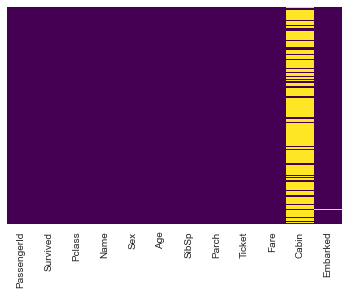

In [14]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar=False, cmap = 'viridis')


In [15]:
dataset.drop('Cabin',axis=1,inplace=True)

In [16]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [17]:
dataset.dropna(inplace = True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [19]:
pd.get_dummies(dataset['Embarked'], drop_first=True).head()


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [20]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
embark = pd.get_dummies(dataset['Embarked'], drop_first=True)


In [21]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
dataset.drop(['Embarked','Sex','Name','Ticket'], axis=1, inplace=True)


In [23]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [24]:
dataset = pd.concat([dataset, sex, embark], axis=1)

In [25]:
dataset.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Now, data is ready for our model!

# Building a model using Logistic Regression

# Train Test Split

In [26]:
dataset.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
dataset['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dataset.drop('Survived', axis=1),
                                               dataset['Survived'], test_size=0.3, random_state=101)


# Training & Predicting

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
accuracy = confusion_matrix(y_test, predictions)

In [35]:
accuracy

array([[149,  14],
       [ 39,  65]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, predictions)
accuracy1

0.8014981273408239

# SAVE MODEL:

In [37]:
import pickle

with open('model_titanic.pkl', 'wb') as f:
    pickle.dump(logmodel, f)